In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test_df = pd.read_csv("test.csv", encoding="utf-8")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# 補中位數
med = train_df.median().drop(["Pclass"])
train_df = train_df.fillna(med)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df = test_df.fillna(med)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
# 補最常出現
most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# 處理name
# import re
# s = "Braund, Mr. Owen Harris"
# pat = "(\w+),\s*(\w+)\.(.+)"
# re.search(pat, s).group(2)
s = "Braund, Mr. Owen Harris"
s = s.split(",")[-1].split(".")[0]
s.strip()

'Mr'

In [9]:
def namecut(s):
    s = s.split(",")[-1].split(".")[0]
    return s.strip()
train_df["Name"].apply(namecut).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
the Countess      1
Lady              1
Jonkheer          1
Sir               1
Capt              1
Don               1
Mme               1
Name: Name, dtype: int64

In [10]:
def namecut(s):
    reserved = ["Mr", "Mrs", "Miss", "Master"]
    s = s.split(",")[-1].split(".")[0]
    s = s.strip()
    if s in reserved:
        return s
    else:
        return None
train_df["Name"] = train_df["Name"].apply(namecut)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,None,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


In [11]:
test_df["Name"] = test_df["Name"].apply(namecut)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,None,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,28.0,0,0,359309,8.0500,NaN,S


In [12]:
train = pd.get_dummies(train_df, 
                       columns=["Name", "Sex", "Embarked"])
predict = pd.get_dummies(test_df, 
                         columns=["Name", "Sex", "Embarked"])
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,1,0,1,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,0,0,0,0,0,1,0,0,1
887,888,1,1,19.0,0,0,112053,30.0000,B42,0,1,0,0,1,0,0,0,1
888,889,0,3,28.0,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1,0,0,0,1
889,890,1,1,26.0,0,0,111369,30.0000,C148,0,0,1,0,0,1,1,0,0


In [13]:
x_train = train.drop(["PassengerId", "Survived", "Ticket", "Cabin"], 
                     axis=1)
y_train = train["Survived"]

x_predict = predict.drop(["PassengerId", "Ticket", "Cabin"], 
                         axis=1)
predict_id = predict["PassengerId"]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(20, 35),
    "max_depth":range(6, 10)
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=4)
grid.fit(x_train, y_train)
print("最佳參數:", grid.best_params_)
print("最佳分數(10次平均):", grid.best_score_)

最佳參數: {'max_depth': 6, 'n_estimators': 28}
最佳分數(10次平均): 0.8384394506866417


In [15]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=27, max_depth=8)
scores = cross_val_score(clf, 
                         x_train, 
                         y_train, 
                         cv=10, 
                         n_jobs=4)
print("十次分數:", scores)
print("平均分數:", sum(scores)/len(scores))

十次分數: [0.77777778 0.84269663 0.71910112 0.87640449 0.91011236 0.83146067
 0.82022472 0.78651685 0.8988764  0.83146067]
平均分數: 0.8294631710362047


In [16]:
clf = RandomForestClassifier(n_estimators=27, max_depth=8)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predict_id,
    "Survived":pre
})
result.to_csv("titanic_rf.csv", 
              encoding="utf-8", 
              index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [24]:
imp = clf.feature_importances_
d = sorted(zip(x_train.columns, imp), 
           key=lambda x:x[1], 
           reverse=True)
pd.DataFrame({
    "Name":[n for n, im in d],
    "Importance":[im for n, im in d]
})

,Name,Importance
0,Fare,0.176665
1,Sex_female,0.137919
2,Sex_male,0.131088
3,Age,0.128714
4,Name_Mr,0.112052
5,Pclass,0.106426
6,SibSp,0.067478
7,Name_Miss,0.039298
8,Parch,0.031735
9,Name_Master,0.019191


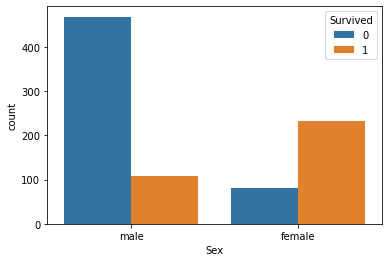

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(x=train_df["Sex"], 
              hue=train_df["Survived"])

Text(0.5, 1.0, 'Fare(Not Survived)')

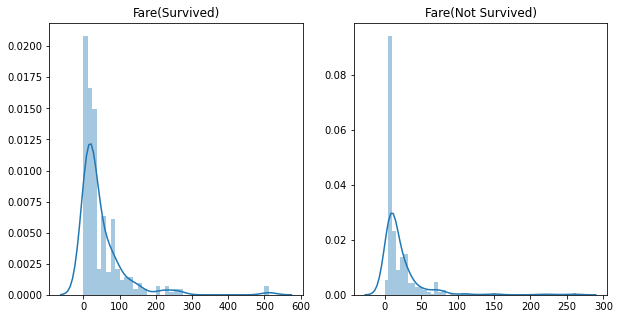

In [58]:
combined = list(zip(train["Fare"], train["Survived"]))
survive = [f for f, s in combined if s == 1]
not_survive = [f for f, s in combined if s == 0]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(survive)
plt.title("Fare(Survived)")
plt.subplot(1, 2, 2)
sns.distplot(not_survive)
plt.title("Fare(Not Survived)")

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_predict_norm = scaler.transform(x_predict)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 100)
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=4)
grid.fit(x_train_norm, y_train)
print("最佳參數:", grid.best_params_)
print("最佳分數(10次平均):", grid.best_score_)

最佳參數: {'n_neighbors': 22}
最佳分數(10次平均): 0.8193508114856428


In [66]:
pre = grid.best_estimator_.predict(x_predict_norm)
result = pd.DataFrame({
    "PassengerId":predict_id,
    "Survived":pre
})
result.to_csv("titanic_knn.csv", 
              encoding="utf-8", 
              index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
